# Data Processing

In [565]:
import pandas as pd
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray
from sklearn.model_selection import train_test_split
from skimage.transform import resize
import tensorflow as tf
import datetime
from sklearn.metrics import confusion_matrix
import itertools
import time


data = pd.read_csv("./data/train.csv")
amount = {"book":0,"can":0,"cardboard":0,"glass_bottle":0,"pen":0,"plastic_bottle":0}
classes= ["book","can","cardboard","glass_bottle","pen","plastic_bottle"]

data_img = []
labels = [] 
    
for index in range(len(data["image"])):
    if (amount["book"]==amount["can"]==amount["cardboard"]==amount["glass_bottle"]
        ==amount["pen"]==amount["plastic_bottle"]==2000):
        break
    if (data["label"][index]==0 and amount["book"]<2000):
        img = imread("./data/img/"+data["image"][index])
        labels.append(0)
        amount["book"] += 1 
        data_img.append(img)
        
    if (data["label"][index]==1 and amount["can"]<2000):
        img = imread("./data/img/"+data["image"][index])
        labels.append(1)
        amount["can"] += 1 
        data_img.append(img)
        
    if (data["label"][index]==2 and amount["cardboard"]<2000):
        img = imread("./data/img/"+data["image"][index])
        labels.append(2)
        amount["cardboard"] += 1 
        data_img.append(img)
        
    if (data["label"][index]==3 and amount["glass_bottle"]<2000):
        img = imread("./data/img/"+data["image"][index])
        labels.append(3)
        amount["glass_bottle"] += 1 
        data_img.append(img)
        
    if (data["label"][index]==4 and amount["pen"]<2000):
        img = imread("./data/img/"+data["image"][index])
        labels.append(4)
        amount["pen"] += 1 
        data_img.append(img)
        
    if (data["label"][index]==5 and amount["plastic_bottle"]<2000):
        img = imread("./data/img/"+data["image"][index])
        labels.append(5)
        amount["plastic_bottle"] += 1 
        data_img.append(img)   

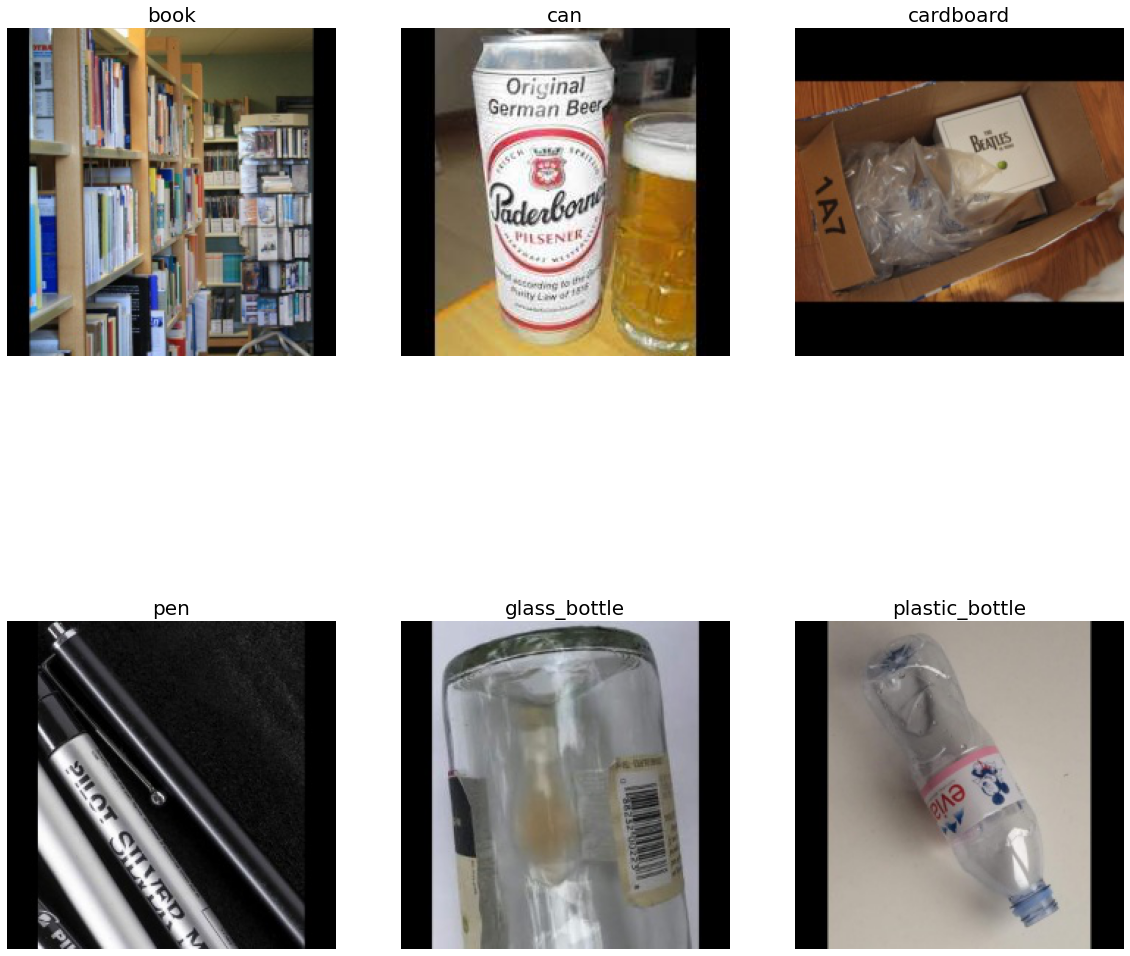

In [566]:
plt.figure(figsize=(20,20))
plt.subplot(231), plt.imshow(data_img[6000]), plt.axis('off')
plt.title(classes[labels[6000]], size=20)
plt.subplot(232), plt.imshow(data_img[9000]), plt.axis('off')
plt.title(classes[labels[9000]], size=20)
plt.subplot(233), plt.imshow(data_img[2500]), plt.axis('off')
plt.title(classes[labels[2500]], size=20)

plt.subplot(234), plt.imshow(data_img[11500]), plt.axis('off')
plt.title(classes[labels[11500]], size=20)
plt.subplot(235), plt.imshow(data_img[1]), plt.axis('off')
plt.title(classes[labels[1]], size=20)
plt.subplot(236), plt.imshow(data_img[10000]), plt.axis('off')
plt.title(classes[labels[10000]], size=20)

plt.show()

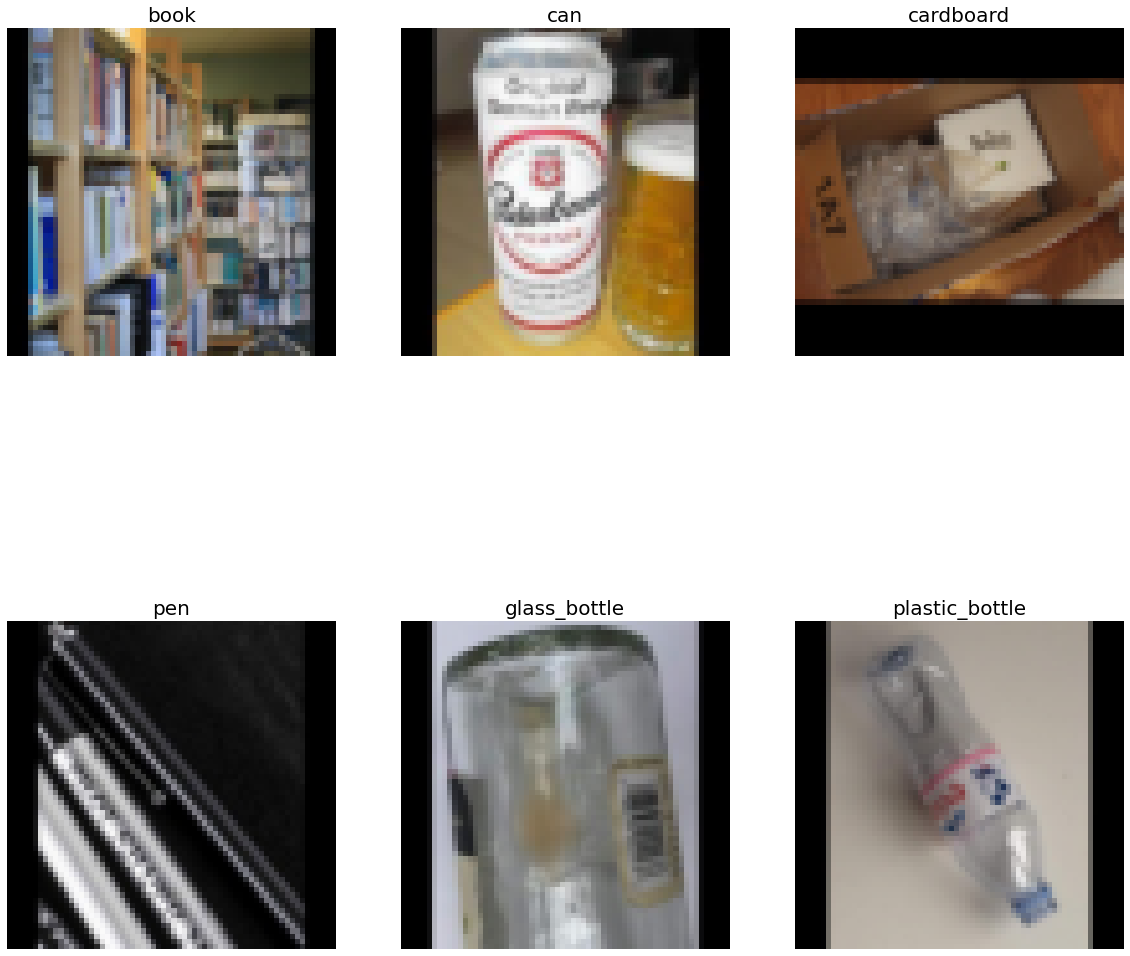

In [567]:
data_img = list(map(lambda img: resize(img, (64,64,3)) ,data_img)) 

for index in range(len(data_img)):
    data_img[0][:64][:64][:3] = data_img[0][:64][:64][:3]/255

    
plt.figure(figsize=(20,20))
plt.subplot(231), plt.imshow(data_img[6000], cmap="gray"), plt.axis('off')
plt.title(classes[labels[6000]], size=20)
plt.subplot(232), plt.imshow(data_img[9000], cmap="gray"), plt.axis('off')
plt.title(classes[labels[9000]], size=20)
plt.subplot(233), plt.imshow(data_img[2500], cmap="gray"), plt.axis('off')
plt.title(classes[labels[2500]], size=20)

plt.subplot(234), plt.imshow(data_img[11500], cmap="gray"), plt.axis('off')
plt.title(classes[labels[11500]], size=20)
plt.subplot(235), plt.imshow(data_img[1], cmap="gray"), plt.axis('off')
plt.title(classes[labels[1]], size=20)
plt.subplot(236), plt.imshow(data_img[10000], cmap="gray"), plt.axis('off')
plt.title(classes[labels[10000]], size=20)

plt.show()

Size:
 (12000, 64, 64, 3)
Balance train set [1600 1600 1600 1600 1600 1600]


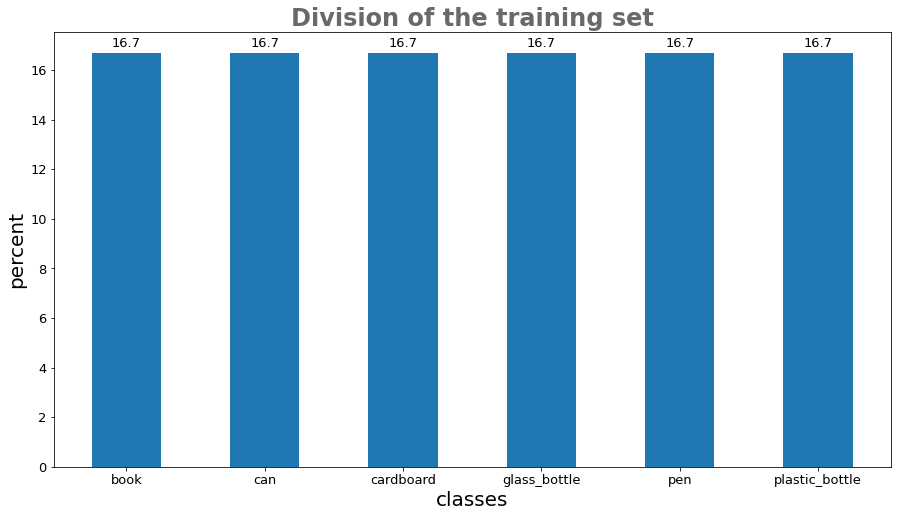

In [568]:
labels =  np.array(labels)      
data_img = np.array(data_img)
print("Size:\n",data_img.shape)

X_train, X_test, y_train, y_test = train_test_split(
       data_img, labels, test_size=0.2, random_state=1, stratify=labels, shuffle=True)

divisionTr = np.bincount(y_train)
divisionTe = np.bincount(y_test)
print("Balance train set", divisionTr)

divisionTr =list(map(lambda el: (el/y_train.shape[0]).__round__(3)*100,divisionTr)) 
fig, ax = plt.subplots(figsize=(15, 8))
chart = ax.bar(classes, divisionTr, width=0.5)
plt.title('Division of the training set',size=24, fontweight="bold", color="dimgray")
plt.xlabel('classes',size=20)
plt.ylabel('percent',size=20)
ax.tick_params(labelsize=13)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',size=13)


autolabel(chart)
plt.show()

Balance test set [400 400 400 400 400 400]


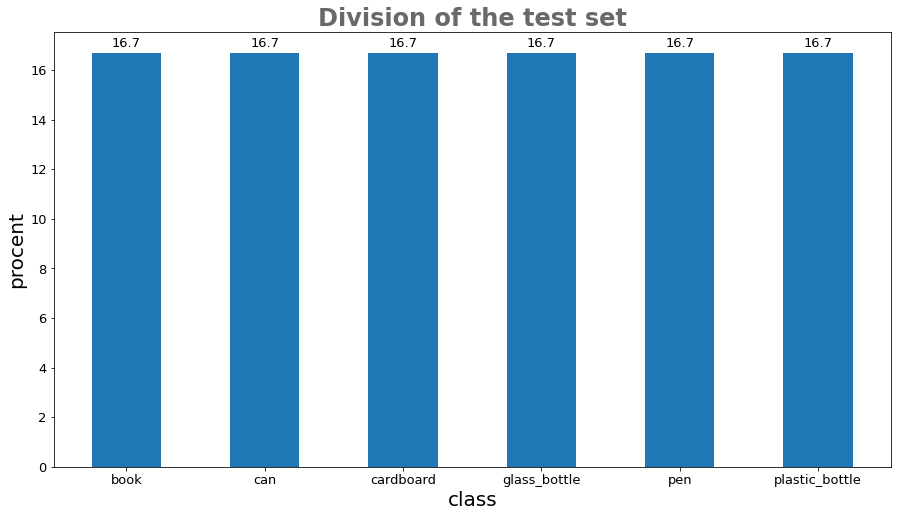

In [569]:
print("Balance test set",divisionTe)

divisionTe =list(map(lambda el: (el/y_test.shape[0]).__round__(3)*100,divisionTe)) 
fig, ax = plt.subplots(figsize=(15, 8))
chart = ax.bar(classes, divisionTe, width=0.5)
plt.title('Division of the test set',size=24, fontweight="bold", color="dimgray")
plt.xlabel('class',size=20)
plt.ylabel('procent',size=20)
ax.tick_params(labelsize=13)


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',size=13)


autolabel(chart)
plt.show()

# Model

In [533]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(64, 64, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Trenowanie i ewaluacja

In [534]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

start_learn = time.time()
history = model.fit(X_train, y_train, epochs=10,validation_data=(X_test, y_test), 
          callbacks=[tensorboard_callback])
end_learn = time.time()
time_learn = end_learn-start_learn

Epoch 1/10
300/300 [==============================] - 6s 17ms/step - loss: 1.6152 - accuracy: 0.3821 - val_loss: 1.4527 - val_accuracy: 0.4358
Epoch 2/10
300/300 [==============================] - 4s 12ms/step - loss: 1.4076 - accuracy: 0.4366 - val_loss: 1.3690 - val_accuracy: 0.4563
Epoch 3/10
300/300 [==============================] - 4s 14ms/step - loss: 1.3436 - accuracy: 0.4616 - val_loss: 1.3310 - val_accuracy: 0.4583
Epoch 4/10
300/300 [==============================] - 4s 15ms/step - loss: 1.3077 - accuracy: 0.4718 - val_loss: 1.3872 - val_accuracy: 0.4446
Epoch 5/10
300/300 [==============================] - 4s 14ms/step - loss: 1.2776 - accuracy: 0.4822 - val_loss: 1.3643 - val_accuracy: 0.4558
Epoch 6/10
300/300 [==============================] - 4s 13ms/step - loss: 1.2554 - accuracy: 0.4988 - val_loss: 1.3078 - val_accuracy: 0.4867
Epoch 7/10
300/300 [==============================] - 4s 15ms/step - loss: 1.2201 - accuracy: 0.5148 - val_loss: 1.3075 - val_accuracy: 0.4796

In [535]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)

75/75 - 0s - loss: 1.2526 - accuracy: 0.4979

Test accuracy: 0.49791666865348816


Text(0.5, 114.59999999999997, 'Predicted')

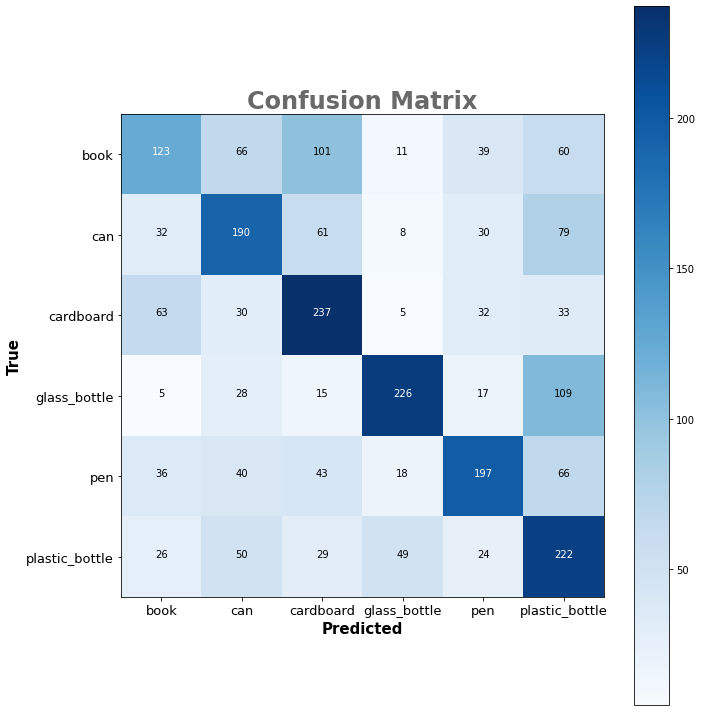

In [536]:
y_pred=model.predict(X_test)
predict_label=np.argmax(y_pred,axis=1)

cm = confusion_matrix(y_test,predict_label)

plt.figure(figsize=(10,10))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix",size=24, fontweight="bold", color="dimgray")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, size=13)
plt.yticks(tick_marks, classes, size=13)
thresh = cm.max() / 2.

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True', size=15, fontweight="bold")
plt.xlabel('Predicted', size=15, fontweight="bold")

# Ocena modelu

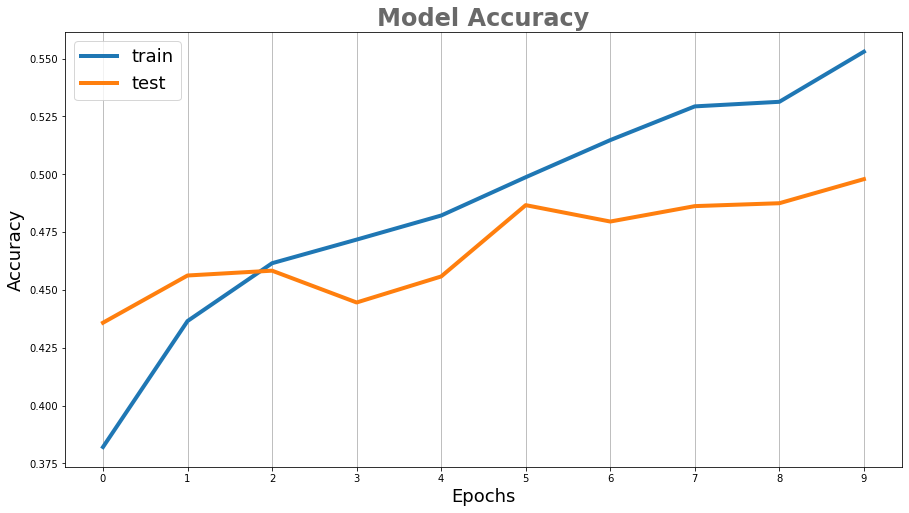

In [537]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

x = np.arange(0,10,1)
plt.figure(figsize=(15,8))
plt.plot(accuracy, label="train", linewidth=4)
plt.plot(val_accuracy, label="test", linewidth=4)
plt.xlabel('Epochs',size=18)
plt.ylabel('Accuracy',size=18)
plt.xticks(x)
plt.title('Model Accuracy', size=24, fontweight="bold", color="dimgray")
plt.grid(axis = 'x')
plt.legend(loc='best', fontsize=18)

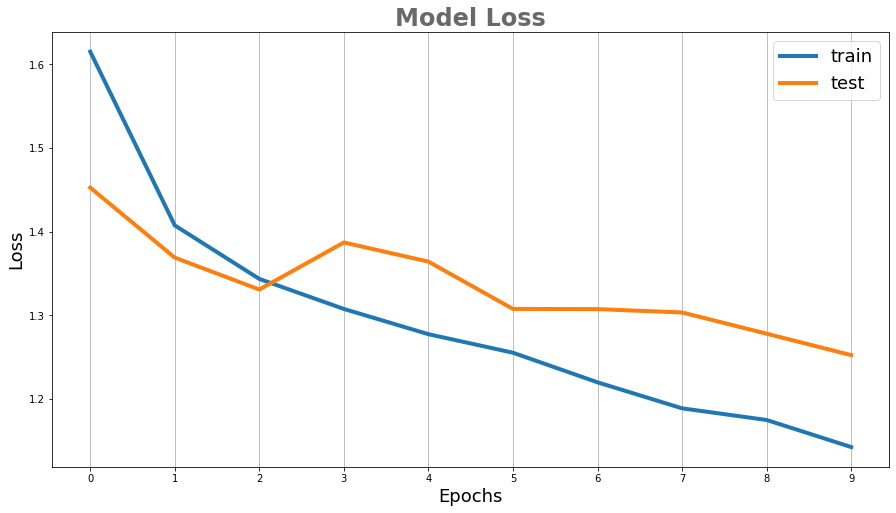

In [538]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(15,8))
plt.plot(loss, label="train", linewidth=4)
plt.plot(val_loss, label="test", linewidth=4)
plt.xlabel('Epochs',size=18)
plt.ylabel('Loss',size=18)
plt.xticks(x)
plt.title('Model Loss', size=24, fontweight="bold", color="dimgray")
plt.grid(axis = 'x')
plt.legend(loc='best', fontsize=18)

# Analiza wyników

In [539]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(classes[predicted_label],
                                100*np.max(predictions_array),
                                classes[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.yticks(np.arange(len(classes)), classes)
    plt.xticks([0,1])
    thisplot = plt.barh(range(6), predictions_array, color="#777777")
    plt.xlim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

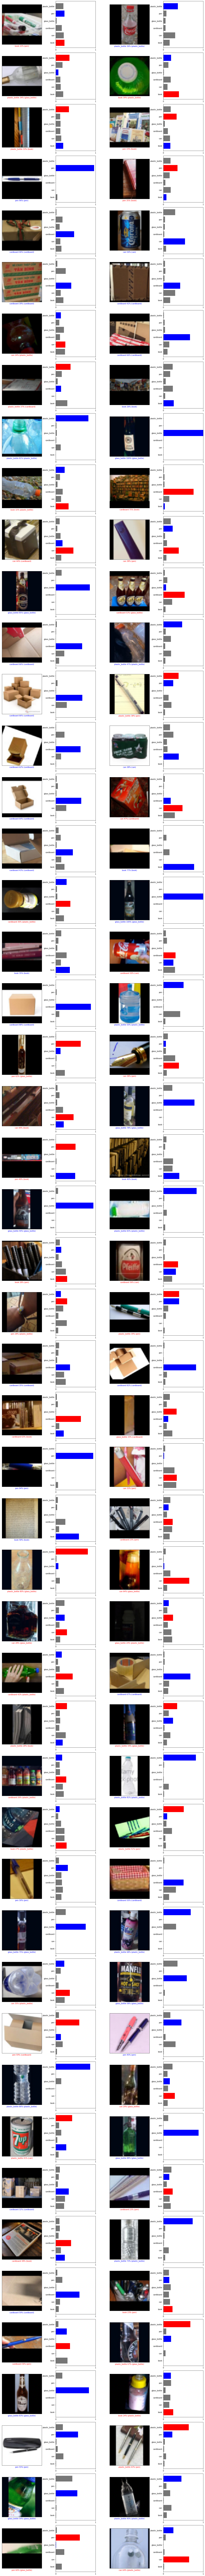

In [540]:
num_rows = 50
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*2*num_cols, 2*2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, y_pred[i], y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, y_pred[i], y_test)
plt.tight_layout()
plt.show()

In [10]:
%load_ext tensorboard
%tensorboard --logdir="logs/fit" --host localhost

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


# Strojenie parametrów sieci

# *

In [543]:
model_sigmoid = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(64, 64, 3)),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model_sigmoid.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


history_sigmoid = model_sigmoid.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
300/300 [==============================] - 5s 13ms/step - loss: 1.5281 - accuracy: 0.3770 - val_loss: 1.4400 - val_accuracy: 0.4208
Epoch 2/10
300/300 [==============================] - 4s 14ms/step - loss: 1.4216 - accuracy: 0.4221 - val_loss: 1.4269 - val_accuracy: 0.4183
Epoch 3/10
300/300 [==============================] - 4s 14ms/step - loss: 1.3959 - accuracy: 0.4314 - val_loss: 1.4004 - val_accuracy: 0.4329
Epoch 4/10
300/300 [==============================] - 4s 12ms/step - loss: 1.3751 - accuracy: 0.4400 - val_loss: 1.3819 - val_accuracy: 0.4425
Epoch 5/10
300/300 [==============================] - 4s 13ms/step - loss: 1.3551 - accuracy: 0.4469 - val_loss: 1.3727 - val_accuracy: 0.4367
Epoch 6/10
300/300 [==============================] - 4s 12ms/step - loss: 1.3378 - accuracy: 0.4500 - val_loss: 1.3730 - val_accuracy: 0.4308
Epoch 7/10
300/300 [==============================] - 4s 13ms/step - loss: 1.3376 - accuracy: 0.4500 - val_loss: 1.3699 - val_accuracy: 0.4521

In [544]:
model_elu = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(64, 64, 3)),
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dense(64, activation='elu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model_elu.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


history_elu = model_elu.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
300/300 [==============================] - 5s 14ms/step - loss: 1.6173 - accuracy: 0.3944 - val_loss: 1.4506 - val_accuracy: 0.4363
Epoch 2/10
300/300 [==============================] - 4s 14ms/step - loss: 1.3567 - accuracy: 0.4550 - val_loss: 1.3470 - val_accuracy: 0.4633
Epoch 3/10
300/300 [==============================] - 4s 15ms/step - loss: 1.3003 - accuracy: 0.4836 - val_loss: 1.2889 - val_accuracy: 0.4842
Epoch 4/10
300/300 [==============================] - 4s 15ms/step - loss: 1.2536 - accuracy: 0.4991 - val_loss: 1.2497 - val_accuracy: 0.5042
Epoch 5/10
300/300 [==============================] - 4s 15ms/step - loss: 1.2107 - accuracy: 0.5204 - val_loss: 1.2375 - val_accuracy: 0.5108
Epoch 6/10
300/300 [==============================] - 4s 14ms/step - loss: 1.1820 - accuracy: 0.5339 - val_loss: 1.3087 - val_accuracy: 0.4933
Epoch 7/10
300/300 [==============================] - 5s 16ms/step - loss: 1.1519 - accuracy: 0.5449 - val_loss: 1.2692 - val_accuracy: 0.5100

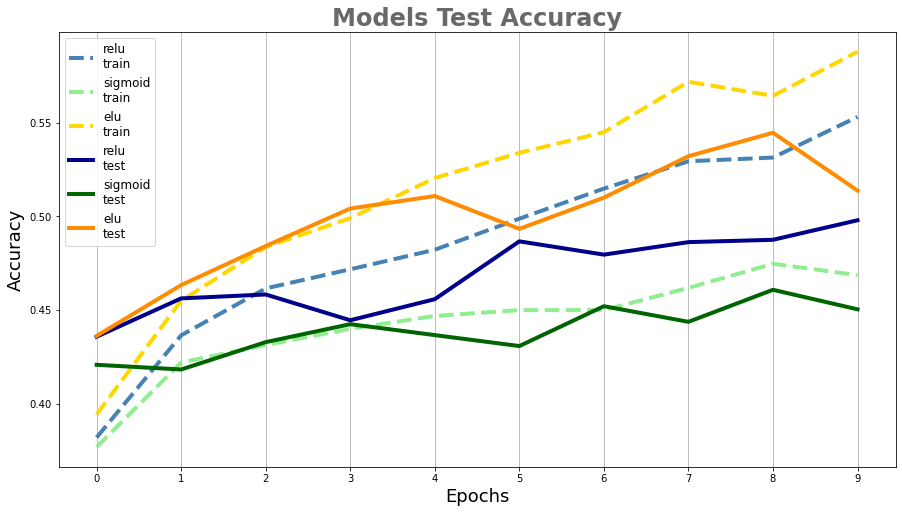

In [545]:
val_accuracy_relu = history.history['val_accuracy']
val_accuracy_sigmoid = history_sigmoid.history['val_accuracy']
val_accuracy_elu = history_elu.history['val_accuracy']

accuracy_relu = history.history['accuracy']
accuracy_sigmoid = history_sigmoid.history['accuracy']
accuracy_elu = history_elu.history['accuracy']

x = np.arange(0,10,1)
plt.figure(figsize=(15,8))

plt.plot(accuracy_relu, label="relu\ntrain", linewidth=4, color="steelblue", ls="--")
plt.plot(accuracy_sigmoid, label="sigmoid\ntrain", linewidth=4, color="lightgreen", ls="--")
plt.plot(accuracy_elu, label="elu\ntrain", linewidth=4, color="gold", ls="--")
plt.plot(val_accuracy_relu, label="relu\ntest", linewidth=4, color="darkblue")
plt.plot(val_accuracy_sigmoid, label="sigmoid\ntest", linewidth=4,color="darkgreen")
plt.plot(val_accuracy_elu, label="elu\ntest", linewidth=4,color="darkorange")
plt.xlabel('Epochs',size=18)
plt.ylabel('Accuracy',size=18)
plt.xticks(x)
plt.title('Models Test Accuracy', size=24, fontweight="bold", color="dimgray")
plt.grid(axis = 'x')
plt.legend(loc='best', fontsize=12)

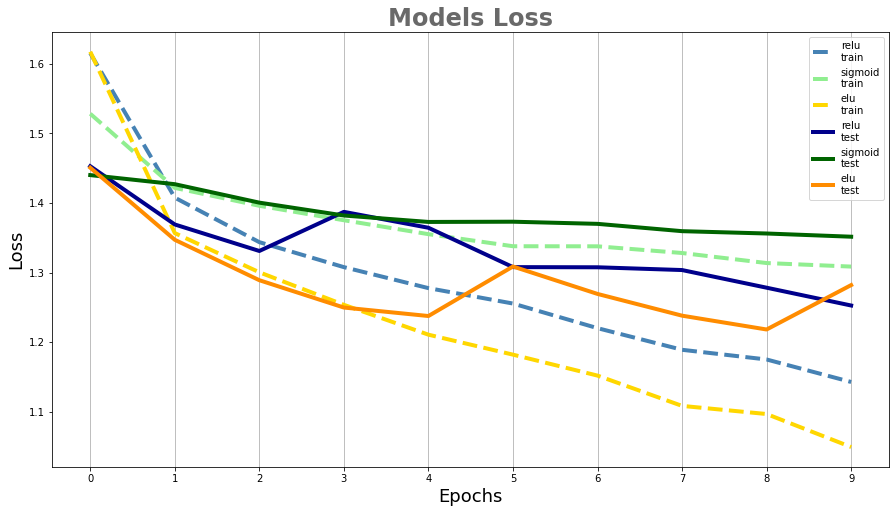

In [546]:
val_loss_relu = history.history['val_loss']
val_loss_sigmoid = history_sigmoid.history['val_loss']
val_loss_elu = history_elu.history['val_loss']

loss_relu = history.history['loss']
loss_sigmoid = history_sigmoid.history['loss']
loss_elu = history_elu.history['loss']

x = np.arange(0,10,1)
plt.figure(figsize=(15,8))
plt.plot(loss_relu, label="relu\ntrain", linewidth=4, color="steelblue", ls="--")
plt.plot(loss_sigmoid, label="sigmoid\ntrain", linewidth=4, color="lightgreen", ls="--")
plt.plot(loss_elu, label="elu\ntrain", linewidth=4, color="gold", ls="--")
plt.plot(val_loss_relu, label="relu\ntest", linewidth=4, color="darkblue")
plt.plot(val_loss_sigmoid, label="sigmoid\ntest", linewidth=4,color="darkgreen")
plt.plot(val_loss_elu, label="elu\ntest", linewidth=4,color="darkorange")
plt.xlabel('Epochs',size=18)
plt.ylabel('Loss',size=18)
plt.xticks(x)
plt.title('Models Loss', size=24, fontweight="bold", color="dimgray")
plt.grid(axis = 'x')
plt.legend(loc='best', fontsize=10)

# *

In [547]:
model_relu = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(64, 64, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model_relu.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


history_relu = model_relu.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
300/300 [==============================] - 5s 15ms/step - loss: 1.5749 - accuracy: 0.3889 - val_loss: 1.3767 - val_accuracy: 0.4558
Epoch 2/30
300/300 [==============================] - 4s 12ms/step - loss: 1.3694 - accuracy: 0.4493 - val_loss: 1.3634 - val_accuracy: 0.4579
Epoch 3/30
300/300 [==============================] - 4s 12ms/step - loss: 1.3272 - accuracy: 0.4666 - val_loss: 1.3837 - val_accuracy: 0.4292
Epoch 4/30
300/300 [==============================] - 4s 12ms/step - loss: 1.2865 - accuracy: 0.4826 - val_loss: 1.2919 - val_accuracy: 0.4729
Epoch 5/30
300/300 [==============================] - 4s 13ms/step - loss: 1.2453 - accuracy: 0.5064 - val_loss: 1.2890 - val_accuracy: 0.4808
Epoch 6/30
300/300 [==============================] - 4s 13ms/step - loss: 1.2189 - accuracy: 0.5125 - val_loss: 1.3033 - val_accuracy: 0.4933
Epoch 7/30
300/300 [==============================] - 4s 13ms/step - loss: 1.1849 - accuracy: 0.5191 - val_loss: 1.3094 - val_accuracy: 0.4879

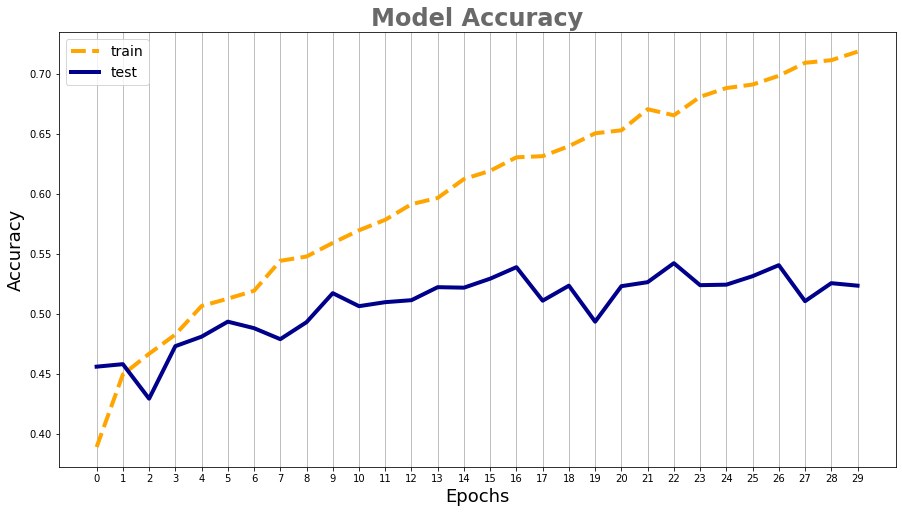

In [548]:
val_accuracy_relu = history_relu.history['val_accuracy']
accuracy_relu = history_relu.history['accuracy']

x = np.arange(0,30,1)
plt.figure(figsize=(15,8))
plt.plot(accuracy_relu, label="train", linewidth=4, color="orange", ls="--")
plt.plot(val_accuracy_relu, label="test", linewidth=4, color="darkblue")
plt.xlabel('Epochs',size=18)
plt.ylabel('Accuracy',size=18)
plt.xticks(x)
plt.title('Model Accuracy', size=24, fontweight="bold", color="dimgray")
plt.grid(axis = 'x')
plt.legend(loc='best', fontsize=14)

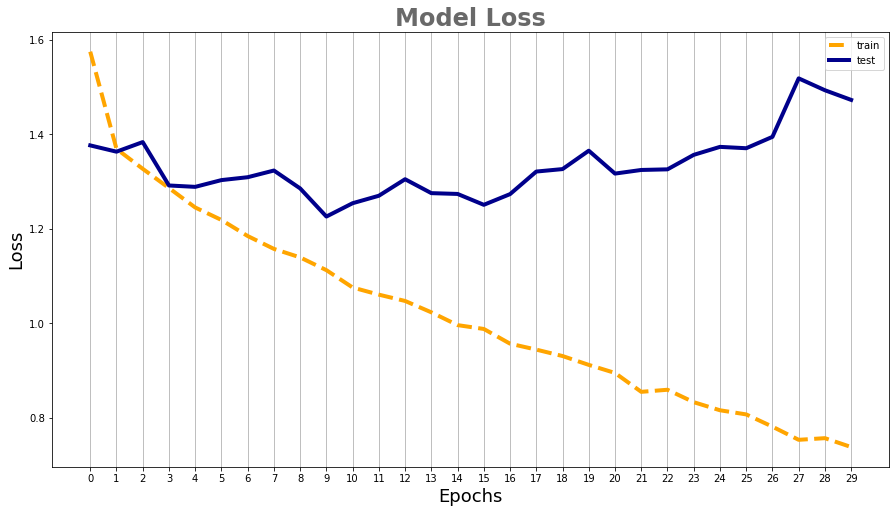

In [549]:
val_loss_relu = history_relu.history['val_loss']
loss_relu = history_relu.history['loss']

x = np.arange(0,30,1)
plt.figure(figsize=(15,8))
plt.plot(loss_relu, label="train", linewidth=4, color="orange", ls="--")
plt.plot(val_loss_relu, label="test", linewidth=4, color="darkblue")
plt.xlabel('Epochs',size=18)
plt.ylabel('Loss',size=18)
plt.xticks(x)
plt.title('Model Loss', size=24, fontweight="bold", color="dimgray")
plt.grid(axis = 'x')
plt.legend(loc='best', fontsize=10)

# *

In [550]:
model_relu_down = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(64, 64, 3)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model_relu_down.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


history_relu_down = model_relu_down.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
300/300 [==============================] - 4s 10ms/step - loss: 1.5899 - accuracy: 0.3642 - val_loss: 1.3980 - val_accuracy: 0.4400
Epoch 2/10
300/300 [==============================] - 3s 8ms/step - loss: 1.4112 - accuracy: 0.4371 - val_loss: 1.3919 - val_accuracy: 0.4412
Epoch 3/10
300/300 [==============================] - 3s 9ms/step - loss: 1.3524 - accuracy: 0.4576 - val_loss: 1.3435 - val_accuracy: 0.4654
Epoch 4/10
300/300 [==============================] - 3s 9ms/step - loss: 1.3330 - accuracy: 0.4686 - val_loss: 1.3601 - val_accuracy: 0.4487
Epoch 5/10
300/300 [==============================] - 3s 8ms/step - loss: 1.3035 - accuracy: 0.4782 - val_loss: 1.3092 - val_accuracy: 0.4754
Epoch 6/10
300/300 [==============================] - 3s 9ms/step - loss: 1.2747 - accuracy: 0.4926 - val_loss: 1.3100 - val_accuracy: 0.4733
Epoch 7/10
300/300 [==============================] - 2s 8ms/step - loss: 1.2612 - accuracy: 0.4994 - val_loss: 1.3299 - val_accuracy: 0.4825
Epoch

In [551]:
model_relu_up= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(64, 64, 3)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model_relu_up.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


history_relu_up = model_relu_up.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
300/300 [==============================] - 8s 24ms/step - loss: 1.6342 - accuracy: 0.3864 - val_loss: 1.4164 - val_accuracy: 0.4087
Epoch 2/10
300/300 [==============================] - 7s 23ms/step - loss: 1.3846 - accuracy: 0.4394 - val_loss: 1.3434 - val_accuracy: 0.4433
Epoch 3/10
300/300 [==============================] - 7s 23ms/step - loss: 1.3177 - accuracy: 0.4590 - val_loss: 1.3389 - val_accuracy: 0.4700
Epoch 4/10
300/300 [==============================] - 7s 24ms/step - loss: 1.2710 - accuracy: 0.4826 - val_loss: 1.3145 - val_accuracy: 0.4675
Epoch 5/10
300/300 [==============================] - 8s 26ms/step - loss: 1.2511 - accuracy: 0.4973 - val_loss: 1.2820 - val_accuracy: 0.4917
Epoch 6/10
300/300 [==============================] - 8s 25ms/step - loss: 1.2071 - accuracy: 0.5183 - val_loss: 1.2866 - val_accuracy: 0.4888
Epoch 7/10
300/300 [==============================] - 8s 26ms/step - loss: 1.1782 - accuracy: 0.5330 - val_loss: 1.2738 - val_accuracy: 0.5029

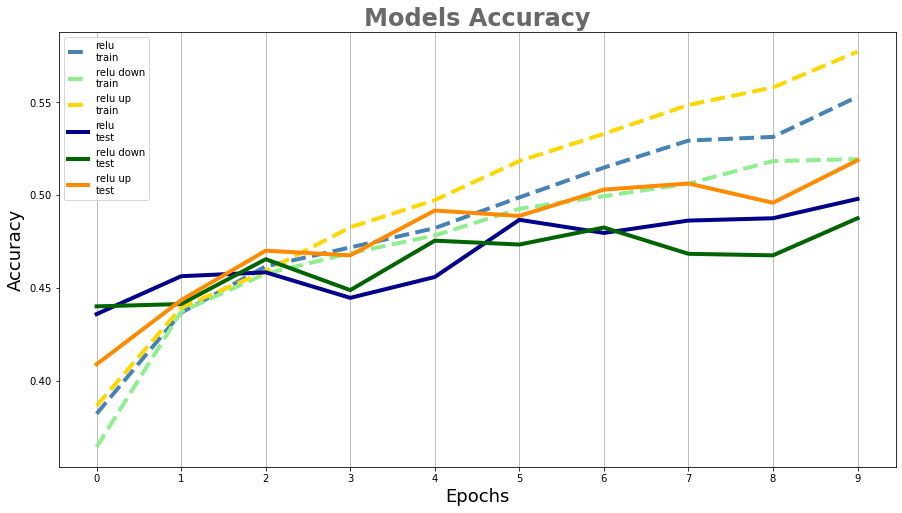

In [552]:
val_accuracy = history.history['val_accuracy']
val_accuracy_down = history_relu_down.history['val_accuracy']
val_accuracy_up = history_relu_up.history['val_accuracy']

accuracy = history.history['accuracy']
accuracy_down = history_relu_down.history['accuracy']
accuracy_up = history_relu_up.history['accuracy']

x = np.arange(0,10,1)
plt.figure(figsize=(15,8))
plt.plot(accuracy, label="relu\ntrain", linewidth=4, color="steelblue", ls="--")
plt.plot(accuracy_down, label="relu down\ntrain", linewidth=4, color="lightgreen", ls="--")
plt.plot(accuracy_up, label="relu up\ntrain", linewidth=4, color="gold", ls="--")
plt.plot(val_accuracy, label="relu\ntest", linewidth=4, color="darkblue")
plt.plot(val_accuracy_down, label="relu down\ntest", linewidth=4,color="darkgreen")
plt.plot(val_accuracy_up, label="relu up\ntest", linewidth=4,color="darkorange")
plt.xlabel('Epochs',size=18)
plt.ylabel('Accuracy',size=18)
plt.xticks(x)
plt.title('Models Accuracy', size=24, fontweight="bold", color="dimgray")
plt.grid(axis = 'x')
plt.legend(loc='best', fontsize=10)

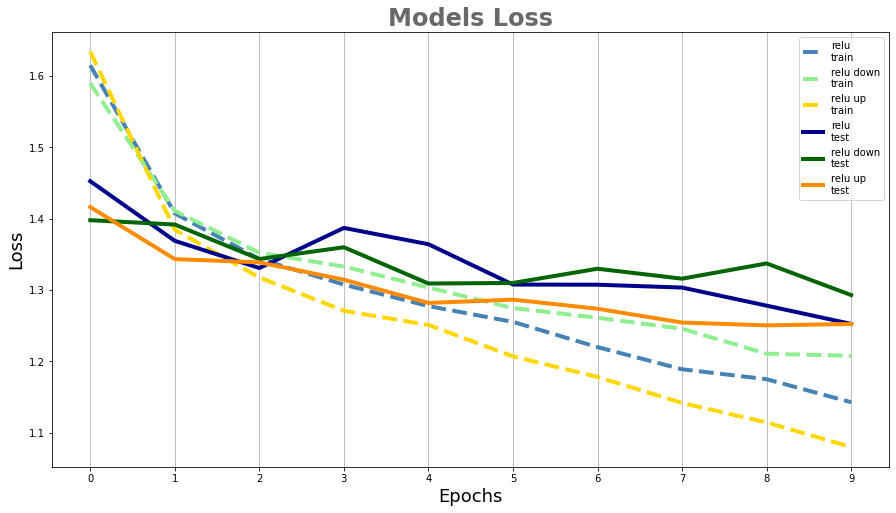

In [553]:
val_loss = history.history['val_loss']
val_loss_down = history_relu_down.history['val_loss']
val_loss_up = history_relu_up.history['val_loss']

loss = history.history['loss']
loss_down = history_relu_down.history['loss']
loss_up = history_relu_up.history['loss']

x = np.arange(0,10,1)
plt.figure(figsize=(15,8))
plt.plot(loss, label="relu\ntrain", linewidth=4, color="steelblue", ls="--")
plt.plot(loss_down, label="relu down\ntrain", linewidth=4, color="lightgreen", ls="--")
plt.plot(loss_up, label="relu up\ntrain", linewidth=4, color="gold", ls="--")
plt.plot(val_loss, label="relu\ntest", linewidth=4, color="darkblue")
plt.plot(val_loss_down, label="relu down\ntest", linewidth=4,color="darkgreen")
plt.plot(val_loss_up, label="relu up\ntest", linewidth=4,color="darkorange")
plt.xlabel('Epochs',size=18)
plt.ylabel('Loss',size=18)
plt.xticks(x)
plt.title('Models Loss', size=24, fontweight="bold", color="dimgray")
plt.grid(axis = 'x')
plt.legend(loc='best', fontsize=10)

# *

In [554]:
model_relu_extra= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(64, 64, 3)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(192, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model_relu_extra.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


history_relu_extra = model_relu_extra.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
300/300 [==============================] - 8s 25ms/step - loss: 1.5837 - accuracy: 0.3633 - val_loss: 1.3956 - val_accuracy: 0.4187
Epoch 2/10
300/300 [==============================] - 7s 24ms/step - loss: 1.3913 - accuracy: 0.4280 - val_loss: 1.3303 - val_accuracy: 0.4704
Epoch 3/10
300/300 [==============================] - 8s 25ms/step - loss: 1.3325 - accuracy: 0.4572 - val_loss: 1.3366 - val_accuracy: 0.4500
Epoch 4/10
300/300 [==============================] - 8s 27ms/step - loss: 1.2773 - accuracy: 0.4847 - val_loss: 1.2811 - val_accuracy: 0.4721
Epoch 5/10
300/300 [==============================] - 8s 27ms/step - loss: 1.2492 - accuracy: 0.4911 - val_loss: 1.3090 - val_accuracy: 0.4900
Epoch 6/10
300/300 [==============================] - 8s 27ms/step - loss: 1.2116 - accuracy: 0.5106 - val_loss: 1.2567 - val_accuracy: 0.4879
Epoch 7/10
300/300 [==============================] - 8s 27ms/step - loss: 1.1755 - accuracy: 0.5332 - val_loss: 1.2755 - val_accuracy: 0.5071

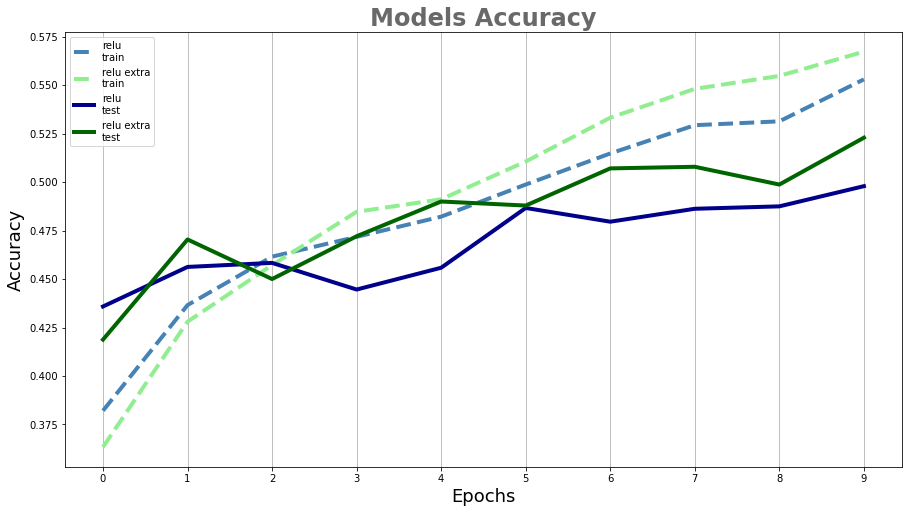

In [556]:
val_accuracy = history.history['val_accuracy']
val_accuracy_extra = history_relu_extra.history['val_accuracy']

accuracy = history.history['accuracy']
accuracy_extra = history_relu_extra.history['accuracy']

x = np.arange(0,10,1)
plt.figure(figsize=(15,8))
plt.plot(accuracy, label="relu\ntrain", linewidth=4, color="steelblue", ls="--")
plt.plot(accuracy_extra, label="relu extra\ntrain", linewidth=4, color="lightgreen", ls="--")
plt.plot(val_accuracy, label="relu\ntest", linewidth=4, color="darkblue")
plt.plot(val_accuracy_extra, label="relu extra\ntest", linewidth=4,color="darkgreen")
plt.xlabel('Epochs',size=18)
plt.ylabel('Accuracy',size=18)
plt.xticks(x)
plt.title('Models Accuracy', size=24, fontweight="bold", color="dimgray")
plt.grid(axis = 'x')
plt.legend(loc='best', fontsize=10)

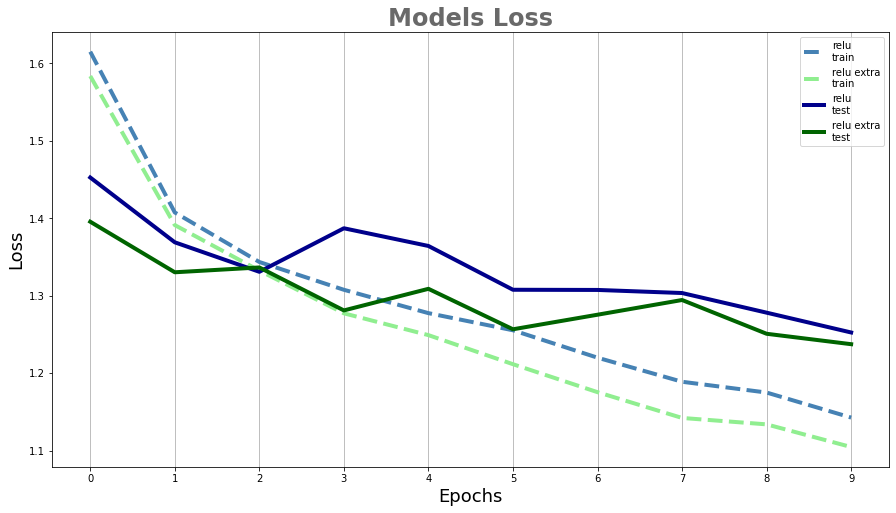

In [557]:
val_loss = history.history['val_loss']
val_loss_extra = history_relu_extra.history['val_loss']

loss = history.history['loss']
loss_extra = history_relu_extra.history['loss']

x = np.arange(0,10,1)
plt.figure(figsize=(15,8))
plt.plot(loss, label="relu\ntrain", linewidth=4, color="steelblue", ls="--")
plt.plot(loss_extra, label="relu extra\ntrain", linewidth=4, color="lightgreen", ls="--")
plt.plot(val_loss, label="relu\ntest", linewidth=4, color="darkblue")
plt.plot(val_loss_extra, label="relu extra\ntest", linewidth=4,color="darkgreen")
plt.xlabel('Epochs',size=18)
plt.ylabel('Loss',size=18)
plt.xticks(x)
plt.title('Models Loss', size=24, fontweight="bold", color="dimgray")
plt.grid(axis = 'x')
plt.legend(loc='best', fontsize=10)

# Konwolucyjne sieci neuronowe

In [558]:
model_cnn = tf.keras.Sequential()
model_cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model_cnn.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(tf.keras.layers.Flatten())
model_cnn.add(tf.keras.layers.Dense(64, activation='relu'))
model_cnn.add(tf.keras.layers.Dense(6))

model_cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [559]:
start_learn_cnn = time.time()
history_cnn = model_cnn.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
end_learn_cnn = time.time()
time_learn_cnn = end_learn_cnn- start_learn_cnn

Epoch 1/10
300/300 [==============================] - 95s 315ms/step - loss: 1.3595 - accuracy: 0.4508 - val_loss: 1.1645 - val_accuracy: 0.5433
Epoch 2/10
300/300 [==============================] - 88s 292ms/step - loss: 1.0951 - accuracy: 0.5810 - val_loss: 1.0424 - val_accuracy: 0.6142
Epoch 3/10
300/300 [==============================] - 85s 284ms/step - loss: 0.9513 - accuracy: 0.6364 - val_loss: 1.0244 - val_accuracy: 0.6192
Epoch 4/10
300/300 [==============================] - 86s 287ms/step - loss: 0.8325 - accuracy: 0.6875 - val_loss: 0.9266 - val_accuracy: 0.6667
Epoch 5/10
300/300 [==============================] - 92s 306ms/step - loss: 0.7150 - accuracy: 0.7354 - val_loss: 0.8831 - val_accuracy: 0.6683
Epoch 6/10
300/300 [==============================] - 90s 301ms/step - loss: 0.5958 - accuracy: 0.7801 - val_loss: 1.0005 - val_accuracy: 0.6625
Epoch 7/10
300/300 [==============================] - 93s 310ms/step - loss: 0.4764 - accuracy: 0.8238 - val_loss: 1.0159 - val_ac

In [560]:
print("Time learn without convolution layers: ", round(time_learn,3))
print("Time learn with convolution layers: ", round(time_learn_cnn,3))

Time learn without convolution layers:  45.16
Time learn with convolution layers:  899.499


In [561]:
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(X_test,  y_test, verbose=2)

print("Improvement: ",round(test_acc_cnn-test_acc,3))

75/75 - 5s - loss: 1.4563 - accuracy: 0.6667
Improvement:  0.169


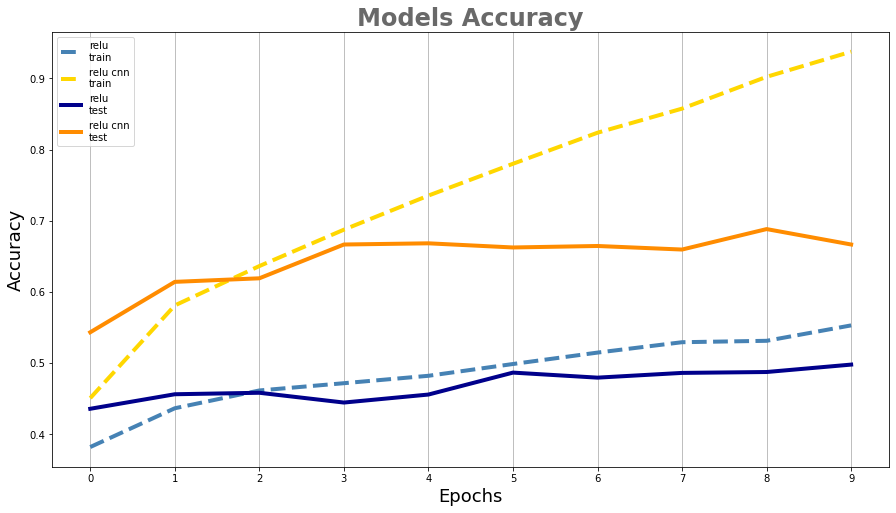

In [562]:
val_accuracy = history.history['val_accuracy']
val_accuracy_cnn = history_cnn.history['val_accuracy']

accuracy = history.history['accuracy']
accuracy_cnn = history_cnn.history['accuracy']

x = np.arange(0,10,1)
plt.figure(figsize=(15,8))
plt.plot(accuracy, label="relu\ntrain", linewidth=4, color="steelblue", ls="--")
plt.plot(accuracy_cnn, label="relu cnn\ntrain", linewidth=4, color="gold", ls="--")
plt.plot(val_accuracy, label="relu\ntest", linewidth=4, color="darkblue")
plt.plot(val_accuracy_cnn, label="relu cnn\ntest", linewidth=4,color="darkorange")
plt.xlabel('Epochs',size=18)
plt.ylabel('Accuracy',size=18)
plt.xticks(x)
plt.title('Models Accuracy', size=24, fontweight="bold", color="dimgray")
plt.grid(axis = 'x')
plt.legend(loc='best', fontsize=10)

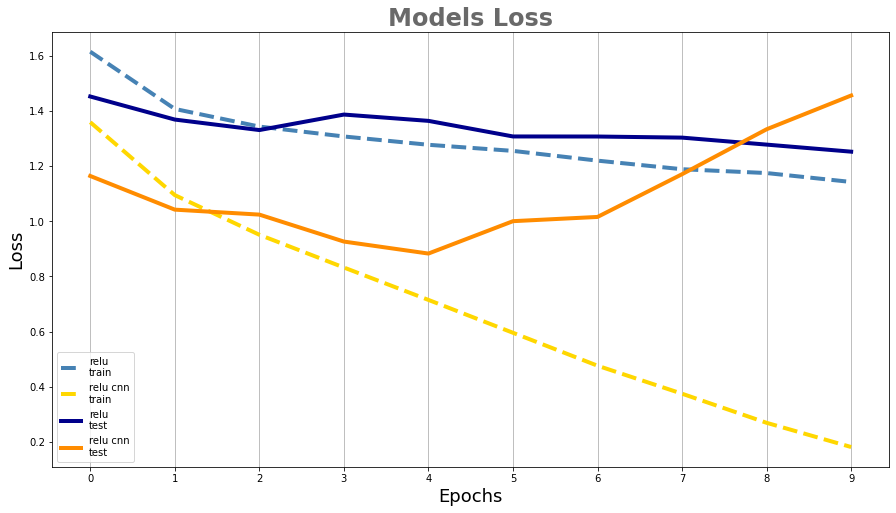

In [563]:
val_loss = history.history['val_loss']
val_loss_cnn = history_cnn.history['val_loss']

loss= history.history['loss']
loss_cnn = history_cnn.history['loss']

x = np.arange(0,10,1)
plt.figure(figsize=(15,8))
plt.plot(loss, label="relu\ntrain", linewidth=4, color="steelblue", ls="--")
plt.plot(loss_cnn, label="relu cnn\ntrain", linewidth=4, color="gold", ls="--")
plt.plot(val_loss, label="relu\ntest", linewidth=4, color="darkblue")
plt.plot(val_loss_cnn, label="relu cnn\ntest", linewidth=4,color="darkorange")
plt.xlabel('Epochs',size=18)
plt.ylabel('Loss',size=18)
plt.xticks(x)
plt.title('Models Loss', size=24, fontweight="bold", color="dimgray")
plt.grid(axis = 'x')
plt.legend(loc='best', fontsize=10)

Text(0.5, 114.59999999999997, 'Predicted')

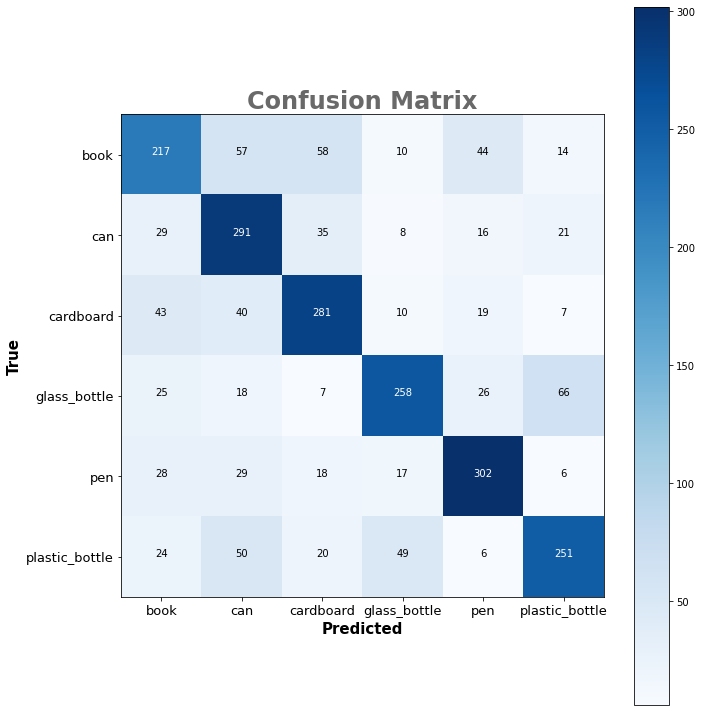

In [564]:
y_pred_cnn = model_cnn.predict(X_test)
predict_label_cnn=np.argmax(y_pred_cnn,axis=1)

cm = confusion_matrix(y_test,predict_label_cnn)

plt.figure(figsize=(10,10))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix",size=24, fontweight="bold", color="dimgray")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, size=13)
plt.yticks(tick_marks, classes, size=13)
thresh = cm_cnn.max() / 2.

for i, j in itertools.product(range(cm_cnn.shape[0]), range(cm_cnn.shape[1])):
    plt.text(j, i, cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True', size=15, fontweight="bold")
plt.xlabel('Predicted', size=15, fontweight="bold")